# Linear Regression

In [7]:
#importing modules

import sklearn as sl
from sklearn import model_selection
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt  

#Checking the dataset features and all related stuff

fulll=load_boston()
print(fulll.data.shape)
a=pd.isna(fulll)
print(a)
print(fulll.feature_names)
bos=pd.DataFrame(fulll.data)
bos.head()
bos.columns=fulll.feature_names
bos['Price']=fulll.target
bos
x=bos.drop("Price",axis=1)
y=bos["Price"]
print(x)

#Splitting the data into train and test datasets
import sklearn
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(x, y, test_size = 0.33, random_state = 5)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(506, 13)
False
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0 

Coeff of Determination (R-Square) on Training: 75.51332741779997


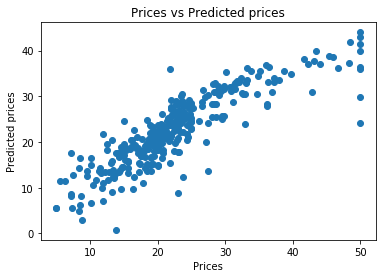

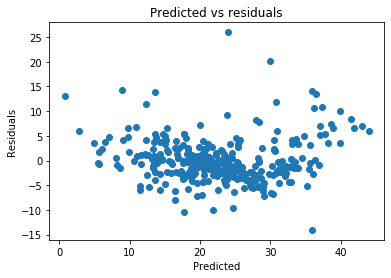

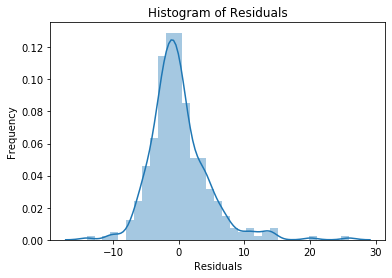

Coeff of Determination (R-Square) on Testing: 69.56551656111607


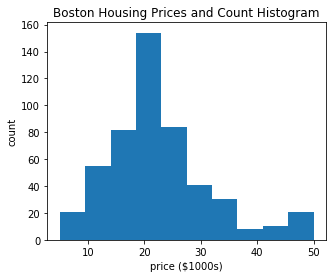

In [10]:
#fitting on training data
from sklearn.linear_model import LinearRegression
Lin_Reg = LinearRegression()
Lin_Reg.fit(xtrain, ytrain)

#Predicting on training data
ypredtrain=Lin_Reg.predict(xtrain)

# Model Evaluation
print('Coeff of Determination (R-Square) on Training:',metrics.r2_score(ytrain, ypredtrain)*100)
#print('Adjusted R^2:',1 - (1-metrics.r2_score(ytrain, ypredtrain))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
#print('MAE:',metrics.mean_absolute_error(ytrain, ypredtrain))
#print('MSE:',metrics.mean_squared_error(ytrain, ypredtrain))
#print('RMSE:',np.sqrt(metrics.mean_squared_error(ytrain, ypredtrain)))


# Visualizing the differences between actual prices and predicted values
plt.scatter(ytrain, ypredtrain)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Checking residuals
plt.scatter(ypredtrain,ytrain-ypredtrain)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Checking Normality of errors
sns.distplot(ytrain-ypredtrain)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


# Predicting Test data with the model
ytestpred = Lin_Reg.predict(xtest)


# Model Evaluation
acc_linreg = metrics.r2_score(ytest, ytestpred)
print('Coeff of Determination (R-Square) on Testing:', acc_linreg*100)

#print('Adjusted R^2:',1 - (1-metrics.r2_score(ytest, ytestpred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
#print('MAE:',metrics.mean_absolute_error(ytest, ytestpred))
#print('MSE:',metrics.mean_squared_error(ytest, ytestpred))
#print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest, ytestpred)))boston = load_boston()
plt.figure(figsize=(5, 4))
plt.hist(boston.target)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

# Random Forest

Coeff of Determination (R-Square) on Training: 97.37384408275585


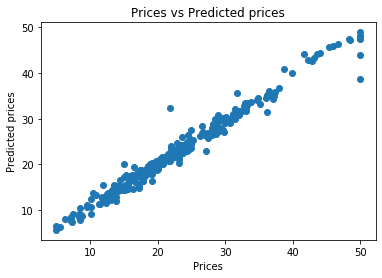

Coeff of Determination: on Testing 89.12839096286216


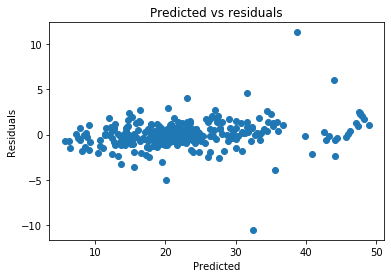

In [6]:
# Import models and metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
RF_FIT=reg.fit(xtrain, ytrain)
RF_FIT

RF_pred = reg.predict(xtrain)

# Model Evaluation on Training Data
print('Coeff of Determination (R-Square) on Training:',metrics.r2_score(ytrain, RF_pred)*100)
#print('Adjusted R^2:',1 - (1-metrics.r2_score(ytrain, RF_pred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
#print('MAE:',metrics.mean_absolute_error(ytrain, RF_pred))
#print('MSE:',metrics.mean_squared_error(ytrain, RF_pred))
#print('RMSE:',np.sqrt(metrics.mean_squared_error(ytrain, RF_pred)))

# Visualizing the differences between actual prices and predicted values
plt.scatter(ytrain, RF_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Predicting Test data with the model
y_test_pred = reg.predict(xtest)

# Model Evaluation on Testing Data
acc_rf = metrics.r2_score(ytest, y_test_pred)
acc_rf
print('Coeff of Determination: on Testing', acc_rf*100)
#print('Adjusted R^2:',1 - (1-metrics.r2_score(ytest, y_test_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
#print('MAE:',metrics.mean_absolute_error(ytest, y_test_pred))
#print('MSE:',metrics.mean_squared_error(ytest, y_test_pred))
#print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest, y_test_pred)))

# Checking residuals
plt.scatter(RF_pred,ytrain-RF_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# SVM

Coeff of Determination (R-Square) on Training :  68.96196605896804


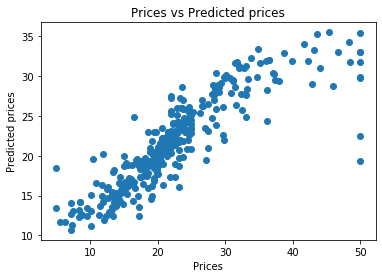

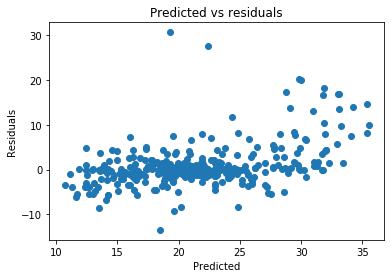

Coeff of Determination (R-Square) on Testing :  54.07283287039839


In [9]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

# Import SVM Regressor
from sklearn import svm
# Create a SVM Regressor
reg = svm.SVR()

# Train the model using the training sets 
reg.fit(xtrain, ytrain)

# Model prediction on train data
ypred = reg.predict(xtrain)

# Model Evaluation
print('Coeff of Determination (R-Square) on Training : ',metrics.r2_score(ytrain, ypred)*100)
#print('Adjusted coeff. of detm:',1 - (1-metrics.r2_score(ytrain, ypred))*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1))
#print('MAE:',metrics.mean_absolute_error(ytrain, ypred))
#print('MSE:',metrics.mean_squared_error(ytrain, ypred))
#print('RMSE:',np.sqrt(metrics.mean_squared_error(ytrain, ypred)))

# Visualizing the differences between actual prices and predicted values
plt.scatter(ytrain, ypred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

# Checking residuals
plt.scatter(ypred,ytrain-ypred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

# Predicting Test data with the model
y_test_pred = reg.predict(xtest)

# Model Evaluation
acc_svm = metrics.r2_score(ytest, y_test_pred)
print('Coeff of Determination (R-Square) on Testing : ', acc_svm*100)
#print('Adjusted R^2:',1 - (1-metrics.r2_score(ytest, y_test_pred))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1))
#print('MAE:',metrics.mean_absolute_error(ytest, y_test_pred))
#print('MSE:',metrics.mean_squared_error(ytest, y_test_pred))
#print('RMSE:',np.sqrt(metrics.mean_squared_error(ytest, y_test_pred)))